# Бизнес-постановка задачи

Цель: разработать модель, которая будет предсказывать вероятность выпадения волос (облысения) у человека на основе различных факторов: 
генетика, медицинские состояния, образ жизни и так далее. 

Использование: по факторам врачи 
(+ специалисты по волосам) смогут выявлять риски и рекомендовать профилактические меры (если риски 
есть)

# ML-задача

Задача сводится к бинарной классификации: определению (предсказанию) выпадения волос (Yes/True/1) и отсутствию
выпадения волос (No/False/0) на основе признаков (факторов)

# О наборе данных

Данные содержат 999 записей (рассмотрено ниже) с разными признаками, влияющими на выпадение волос: генетика, гормональные изменения, медицинские состояния, лечение, питание, стресс, возраст, вредные привычки и другие. Все факторы должны позволить модели учитывать комплекс факторов для наиболее точного предсказания. Датасет взят из каггла (линк: https://www.kaggle.com/datasets/amitvkulkarni/hair-health/data)

Описание каждого из полей (с каггла):

Genetics: Indicates whether the individual has a family history of baldness (Yes/No).

Hormonal Changes: Indicates whether the individual has experienced hormonal changes (Yes/No).

Medical Conditions: Lists specific medical conditions that may contribute to baldness, such as Alopecia Areata, Thyroid Problems, Scalp Infection, Psoriasis, Dermatitis, etc.

Medications & Treatments: Lists medications and treatments that may lead to hair loss, such as Chemotherapy, Heart Medication, Antidepressants, Steroids, etc.

Nutritional Deficiencies: Lists nutritional deficiencies that may contribute to hair loss, such as Iron deficiency, Vitamin D deficiency, Biotin deficiency, Omega-3 fatty acid deficiency, etc.

Stress: Indicates the stress level of the individual (Low/Moderate/High).

Age: Represents the age of the individual.

Poor Hair Care Habits: Indicates whether the individual practices poor hair care habits (Yes/No).

Environmental Factors: Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).

Smoking: Indicates whether the individual smokes (Yes/No).

Weight Loss: Indicates whether the individual has experienced significant weight loss (Yes/No).

Baldness (Target): Binary variable indicating the presence (1) or absence (0) of baldness in the individual.

# Метрики

В качестве первоначальной метрики выбираю recall, как принято в медицинских и полумедицинских данных, тк считаю, что лучше что-то сделать лишнее, чем не сделать ничего и подставить себя возможному риску. Естественно важно будет и смотреть за тем, как модель будет справляться с FP, так что дополнительно посмотрел бы на картину в целом благодаря F-мере или на roc auc

# Первоначальное рассмотрение данных

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Predict Hair Fall.csv')

In [5]:
df.describe()

,Id,Age,Hair Loss
count,999.000000,999.000000,999.000000
mean,153354.673674,34.188188,0.497497
std,25516.041985,9.377980,0.500244
min,110003.000000,18.000000,0.000000
25%,131867.500000,26.000000,0.000000
50%,152951.000000,34.000000,0.000000
75%,174969.000000,42.000000,1.000000
max,199949.000000,50.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [35]:
for i in df.columns:
    if i != 'Id':
        print(i)
        print (df[i].unique())

Genetics
['Yes' 'No']
Hormonal Changes
['No' 'Yes']
Medical Conditions
['No Data' 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia']
Medications & Treatments
['No Data' 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication ']
Nutritional Deficiencies 
['Magnesium deficiency' 'Protein deficiency' 'Biotin Deficiency '
 'Iron deficiency' 'Selenium deficiency' 'Omega-3 fatty acids'
 'Zinc Deficiency' 'Vitamin A Deficiency' 'Vitamin D Deficiency' 'No Data'
 'Vitamin E deficiency']
Stress
['Moderate' 'High' 'Low']
Age
[19 43 26 46 30 37 40 35 49 48 20 34 29 33 28 41 21 22 45 24 31 39 38 36
 18 44 50 27 25 23 47 32 42]
Poor Hair Care Habits 
['Yes' 'No']
Environmental Factors
['Yes' 'No']
Smoking
['No' 'Yes']
Weight Loss 
['No' 'Yes']
Hair Loss
[0 1]


### Комментарий по предыдущим ячейкам

Многие столбцы могут быть переведены из object (string) в numeric значения или значения от 0 до n, так как логически несут
мысль увеличения чего-либо (речь о стрессе). Оставшиеся поля придется оставить стринговыми, но это не принесет большой мороки, тк в одной из лекций приметил для себя корреляцию Phik, которая со всем разберется.
Прикольно, что нет пропусков данных (хотя есть "No Data"), но в совокупности с объемом датасета есть намеки на искусственность датасета... (об этом на каггле не уточнялось, но допускаю возможным). Слишком идеальный датасет))
Пока что по этим ячейкам доп выводов не сделать, идем дальше

In [39]:
df_forAnalisys = df.copy()

In [42]:
for i in df_forAnalisys.columns:
    df_forAnalisys[[i]] = df_forAnalisys[[i]].replace('No',0)
    df_forAnalisys[[i]] = df_forAnalisys[[i]].replace('Yes',1)
    df_forAnalisys[[i]] = df_forAnalisys[[i]].replace('Moderate',1)
    df_forAnalisys[[i]] = df_forAnalisys[[i]].replace('High',2)
    df_forAnalisys[[i]] = df_forAnalisys[[i]].replace('Low',0)

/var/folders/kn/ths93g955tjfb00q7rp5hknc0000gn/T/ipykernel_14516/339397056.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_forAnalisys[[i]] = df_forAnalisys[[i]].replace('Low',0)


In [65]:
def columns_spaces(i):
    return i.replace(' ', '_')

df_forAnalisys.columns = df_forAnalisys.columns.map(columns_spaces)

In [72]:
df_forAnalisys['Age_group'] = df_forAnalisys['Age'].apply(
    lambda x: 0 if 18 <= x <= 30 else (1 if 31 <= x <= 40 else (2 if x > 40 else null)))

In [66]:
import plotly.express as px
import matplotlib.pyplot as plt

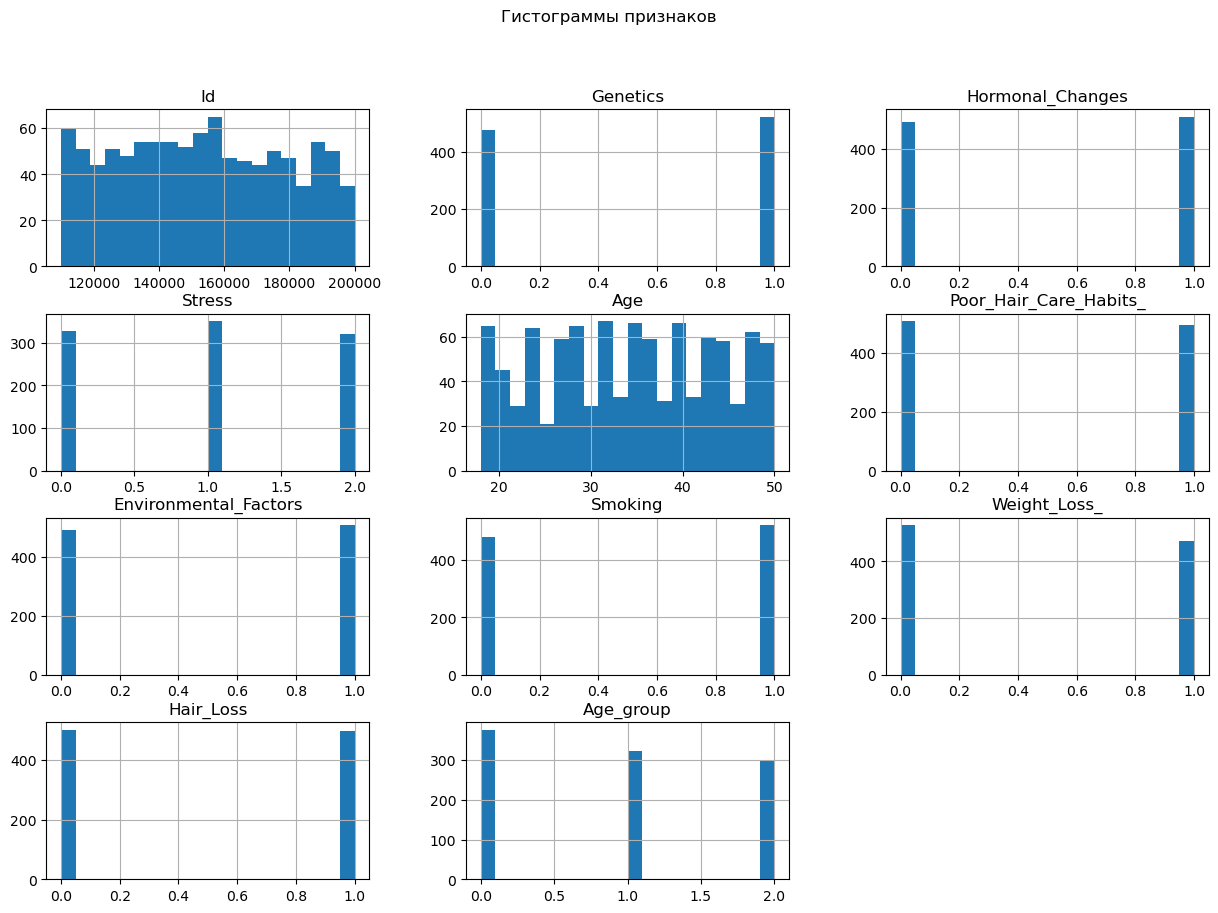

In [73]:
df_forAnalisys.hist(bins=20, figsize=(15, 10))
plt.suptitle('Гистограммы признаков')
plt.show()

In [69]:
df_forAnalisys.Hair_Loss.value_counts()

Hair_Loss
0    502
1    497
Name: count, dtype: int64

### Комментарий по предыдущим ячейкам

Здорово (для ml, но не работы с данными), что действительно не оказалось нулевых данных и каких-то странных выборосов И вдобавок все признаки практически идеально (имею в виду равномерно) распределены. Это опять же намекает на некоторую либо предобработку данных, либо изначальную искусственность, созданную для обучения (ни о том и о том опять же информации нет)

Целевая переменная - haır loss, ее собственно и предлагается предсказывать. Распределена равномерно, половина данных c лейблом нуля, половина(чуть меньше) - с проблемой облысения

Другие признаки ведут себя похожим образом, стресс - распределен равномерно между 0,1 и 2 где в 0 был преобразован 'low', 1 - 'moderate', 2 - 'high'

Возраст распределен более хаотично, но если посмотреть на него, разбив по примерным группам [18-30, 31-40, 41+], то видно, что все также примерно распределилось равномерно между [0,1,2] соответственно

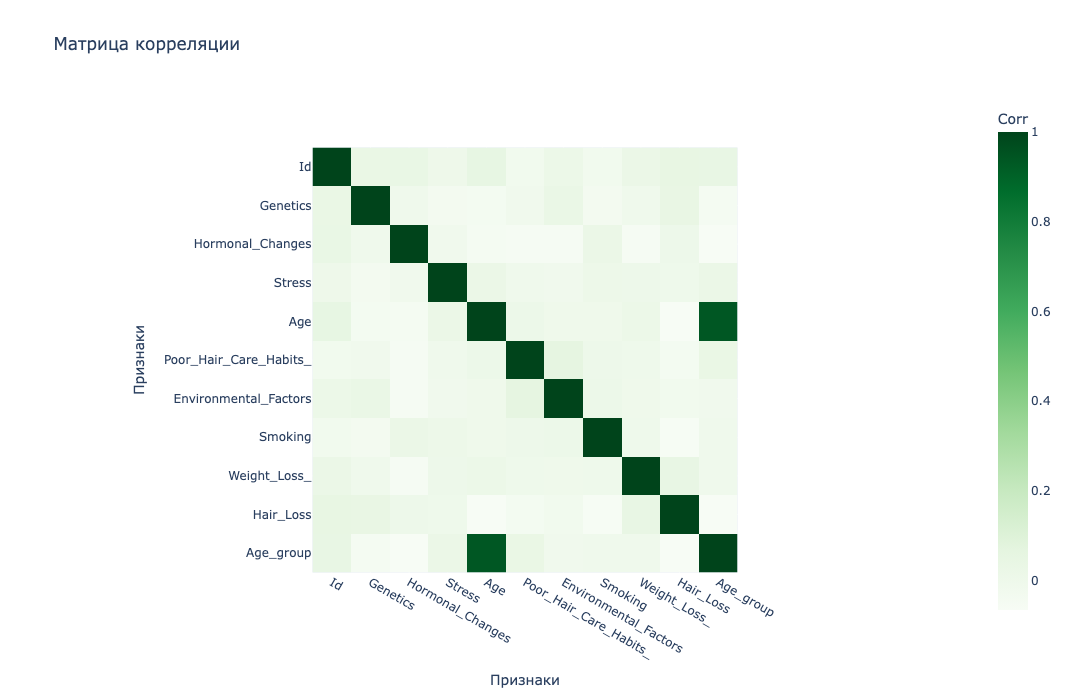

In [107]:
num_cols = df_forAnalisys.select_dtypes(include=['number']).columns
corr_matrix = df_forAnalisys[num_cols].corr(method='pearson')

fig = px.imshow(
    corr_matrix.values,
    x = corr_matrix.columns,
    y = corr_matrix.index,
    color_continuous_scale='Greens',
    title='Матрица корреляции',
    labels=dict(x="Признаки", y="Признаки", color="Corr"),
    height = 700,
    width = 700
)

fig.show()

In [77]:
from phik import phik_matrix

interval columns not set, guessing: ['Id', 'Genetics', 'Hormonal_Changes', 'Stress', 'Age', 'Poor_Hair_Care_Habits_', 'Environmental_Factors', 'Smoking', 'Weight_Loss_', 'Hair_Loss', 'Age_group']


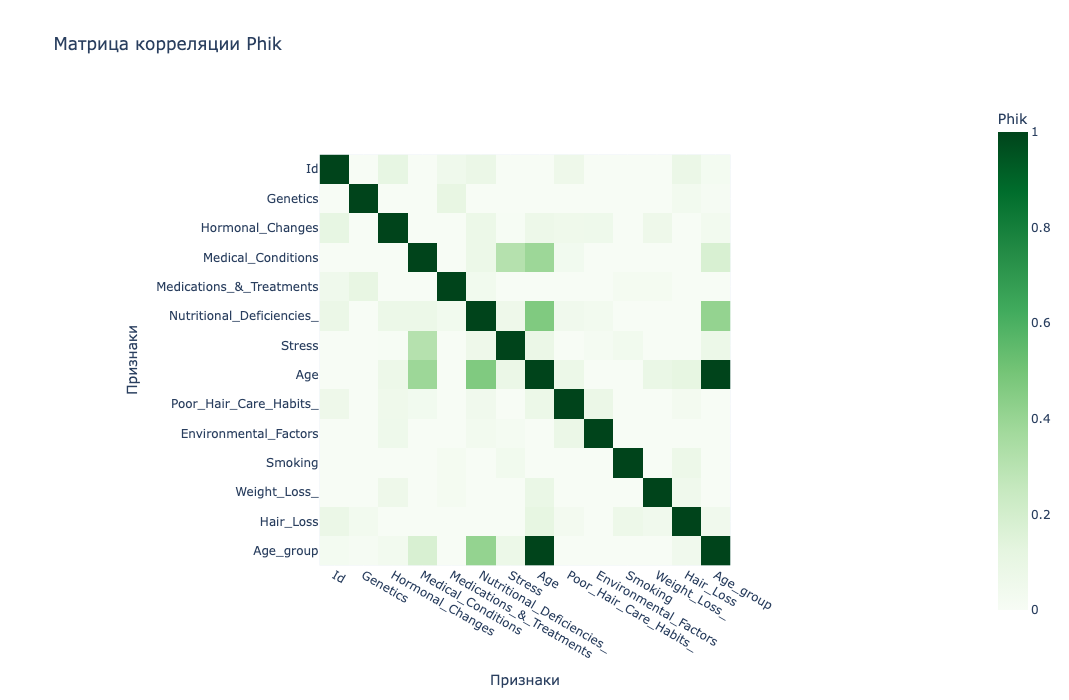

In [105]:
phik_corr = df_forAnalisys.phik_matrix()

fig = px.imshow(
    phik_corr.values,
    x=phik_corr.columns,
    y=phik_corr.index,
    color_continuous_scale='Greens',
    title='Матрица корреляции Phik',
    labels=dict(x="Признаки", y="Признаки", color="Phik")
)

fig.update_layout(width=700, height=700)
fig.show()

### Комментарии

Ситуация грустная, пока что не понятно получится ли сделать приемлемого качества модель, тк целевая переменная крайне слабо зависит от любого из показателей

Из плюсов: судя по низкой корреляции признаков, мультиколлинеарности здесь искать не стоит)

Скорее всего факт облысения объявляется под влиянием некоторого множества признаков, которые в совокупности должны оказывать влияние на то, теряет ли человек волосы или нет.